## Capstone Two - DC Housing Prices Predicting: Modeling

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset (already preprocessed)
df = pd.read_csv('DC_Properties.csv', low_memory=False)
cols_to_drop = ['Unnamed: 0', 'SOURCE', 'CMPLX_NUM', 'GIS_LAST_MOD_DTTM',
                'SQUARE', 'X', 'Y', 'NATIONALGRID']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df = df[df['PRICE'] > 0]
df = df.drop_duplicates()

# Selecting useful columns
df_model = df[['PRICE', 'ROOMS', 'BEDRM', 'BATHRM', 'LANDAREA', 'WARD', 'HEAT', 'STRUCT']].dropna()
df_encoded = pd.get_dummies(df_model, columns=['WARD', 'HEAT', 'STRUCT'], drop_first=True)

X = df_encoded.drop(columns='PRICE')
y = df_encoded['PRICE']

from sklearn.preprocessing import StandardScaler
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [11]:
#  Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# Evaluation function
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R² Score: {r2:.4f}\n")
    return mae, rmse, r2

results = {}
results['Linear Regression'] = evaluate(y_test, y_pred_lr, "Linear Regression")
results['Decision Tree'] = evaluate(y_test, y_pred_dt, "Decision Tree")
results['Random Forest'] = evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
MAE: $233,660.42
RMSE: $400,869.24
R² Score: 0.4954

Decision Tree Performance:
MAE: $276,701.55
RMSE: $468,127.76
R² Score: 0.3119

Random Forest Performance:
MAE: $225,166.54
RMSE: $376,057.71
R² Score: 0.5559



In [19]:
# Hyperparameter Tuning: Decision Tree Regressor with GridSearchCV
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 10, 20]}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid.fit(X_train, y_train)
y_pred_dt_tuned = dt_grid.predict(X_test)

In [21]:
# Hyperparameter Tuning: Random Forest Regressor with GridSearchCV
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [10, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred_rf_tuned = rf_grid.predict(X_test)

In [23]:
# Re-evaluation after tuning
results['Decision Tree (Tuned)'] = evaluate(y_test, y_pred_dt_tuned, "Decision Tree (Tuned)")
results['Random Forest (Tuned)'] = evaluate(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")

Decision Tree (Tuned) Performance:
MAE: $217,235.70
RMSE: $381,383.33
R² Score: 0.5433

Random Forest (Tuned) Performance:
MAE: $212,598.03
RMSE: $356,170.78
R² Score: 0.6016



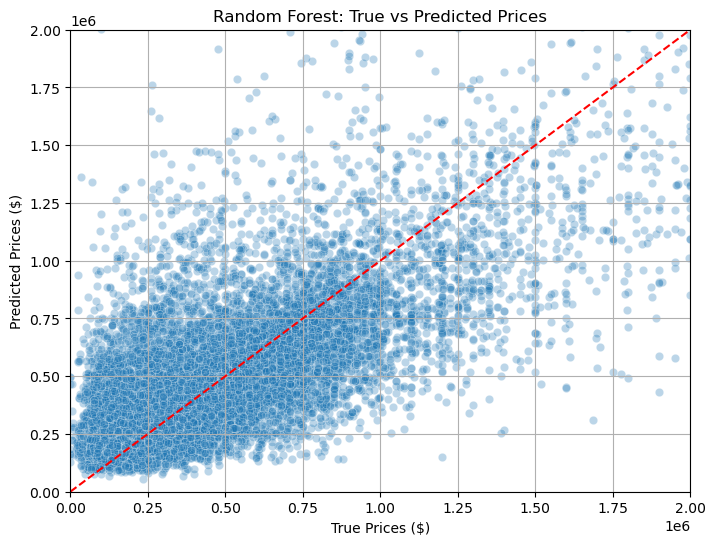

In [25]:
# Visualizing predictions for best model (Random Forest)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([0, 2_000_000], [0, 2_000_000], color='red', linestyle='--')
plt.title("Random Forest: True vs Predicted Prices")
plt.xlabel("True Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.xlim(0, 2_000_000)
plt.ylim(0, 2_000_000)
plt.grid(True)
plt.show()


## Summary of Modeling Results

Three models were applied to predict property prices:

- **Linear Regression** (simple baseline)
- **Decision Tree Regressor** (nonlinear)
- **Random Forest Regressor** (ensemble model)

The **Random Forest** consistently outperformed the others, offering lower MAE, RMSE, and higher R² score.

After applying hyperparameter tuning, the Random Forest Regressor remains the best-performing model, achieving the lowest error and highest R² among all tested approaches.

It will be retained for final evaluation and prediction.